In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import os

In [12]:
# build_features(task='sa')
# build_features(task='olid')

In [13]:
# sa_features = pd.read_csv('./features/nv-ratio-sa.txt', sep='\t')
# olid_features = pd.read_csv('./features/nv-ratio-olid.txt', sep='\t')

In [14]:
features = pd.read_csv('./features-news/pos-ratio.csv')

In [15]:
features.sort_values(by='pron')

,lang,noun,pron,verb,noun2verb,pron2noun
0,ara,0.442545,0.004390,0.101444,0.813518,0.009822
7,jpn,0.376245,0.004974,0.106034,0.780139,0.013048
8,kor,0.342130,0.006484,0.066947,0.836345,0.018599
15,zho,0.551108,0.018713,0.113059,0.829773,0.032840
4,fas,0.550826,0.021052,0.059651,0.902287,0.036812
13,tam,0.473732,0.028432,0.141764,0.769676,0.056618
14,tur,0.390962,0.031069,0.256611,0.603734,0.073617
9,nld,0.224220,0.036318,0.148487,0.601599,0.139396
5,fra,0.296398,0.040701,0.111801,0.726112,0.120739
11,pol,0.325665,0.042144,0.108405,0.750259,0.114580


In [16]:
# df = pd.concat([sa_features, olid_features])

In [17]:
# groups = df.groupby('task')
# fig, ax = plt.subplots(figsize=(12, 12))
# plt.xlim(-0.05, 1.05)
# plt.ylim(-0.05, 1.05)
# for name, group in groups:
#     ax.plot(group.noun, 
#             group.verb, 
#             marker='o', 
#             linestyle='',
#             label=name)
#     lang = group.lang
#     for i, lang_name in enumerate(lang):
#         if name == 'olid':
#             ax.annotate(lang_name, (group.noun[i]-0.01, group.verb[i] + 0.01),
#                         fontsize=14)
#         elif lang_name == 'spa':
#             ax.annotate(lang_name, (group.noun[i]-0.025, group.verb[i]-0.015),
#                         fontsize=14)
#         else:
#             ax.annotate(lang_name, (group.noun[i]+ 0.005, group.verb[i]-0.01),
#                         fontsize=14)
# ax.legend(fontsize=16, loc='upper right')
# ax.set_xlabel('Pronoun-token Ratio', fontdict={'size':16})
# ax.set_ylabel('Verb-token Ratio', fontdict={'size':16})
# plt.savefig('pron_verb_ratio_plot.png')
# plt.show()

In [18]:
map_name = {
    'pron': 'Pronoun',
    'verb': 'Verb'
}

In [19]:
features

,lang,noun,pron,verb,noun2verb,pron2noun
0,ara,0.442545,0.004390,0.101444,0.813518,0.009822
1,ces,0.289307,0.044860,0.123549,0.700745,0.134243
2,deu,0.213023,0.064108,0.090829,0.701075,0.231329
3,eng,0.223553,0.067302,0.127988,0.635924,0.231392
4,fas,0.550826,0.021052,0.059651,0.902287,0.036812
5,fra,0.296398,0.040701,0.111801,0.726112,0.120739
6,hin,0.316791,0.048823,0.092719,0.773586,0.133536
7,jpn,0.376245,0.004974,0.106034,0.780139,0.013048
8,kor,0.342130,0.006484,0.066947,0.836345,0.018599
9,nld,0.224220,0.036318,0.148487,0.601599,0.139396


In [20]:
area = ['Middle East', 'East Europe', 'West Europe', 'West Europe',
        'Middle East', 'West Europe', 'South Asia', 'East Asia',
        'East Asia', 'West Europe', 'East Europe', 'East Europe', 
        'West Europe', 'South Asia', 'Middle East', 'East Asia']
features['area'] = area
features

,lang,noun,pron,verb,noun2verb,pron2noun,area
0,ara,0.442545,0.004390,0.101444,0.813518,0.009822,Middle East
1,ces,0.289307,0.044860,0.123549,0.700745,0.134243,East Europe
2,deu,0.213023,0.064108,0.090829,0.701075,0.231329,West Europe
3,eng,0.223553,0.067302,0.127988,0.635924,0.231392,West Europe
4,fas,0.550826,0.021052,0.059651,0.902287,0.036812,Middle East
5,fra,0.296398,0.040701,0.111801,0.726112,0.120739,West Europe
6,hin,0.316791,0.048823,0.092719,0.773586,0.133536,South Asia
7,jpn,0.376245,0.004974,0.106034,0.780139,0.013048,East Asia
8,kor,0.342130,0.006484,0.066947,0.836345,0.018599,East Asia
9,nld,0.224220,0.036318,0.148487,0.601599,0.139396,West Europe


In [21]:
?ax.plot

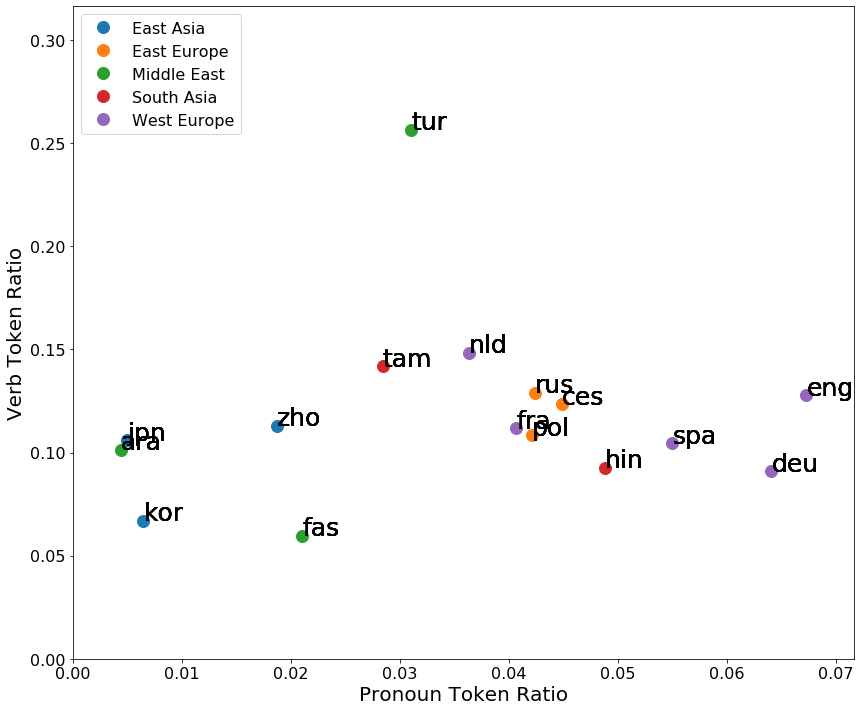

In [22]:
fig, ax = plt.subplots(figsize=(14, 12))
plt.xlim(0, max(features['pron']) + min(features['pron']))
plt.ylim(0, max(features['verb']) + min(features['verb']))
for group, langs in features.groupby('area'):
    ax.plot(langs['pron'], langs['verb'],
            marker='o', linestyle='', label=group,
            markersize=12)
    for i, lang_name in enumerate(features['lang']):
        ax.annotate(lang_name,
                    (features['pron'][i], features['verb'][i]),
                    fontsize=25) # to adjust lang label size
    ax.set_xlabel('Pronoun Token Ratio', fontdict={'size':20}) # to adjust x-axis label size
    ax.set_ylabel('Verb Token Ratio', fontdict={'size':20}) # to adjus
    ax.tick_params(axis='both', which='major', labelsize=16)
    ax.legend(fontsize=16, loc='upper left') # legend position


In [23]:
import numpy as np
np.float(features['pron'][0] - 1)

-0.9956102740921168

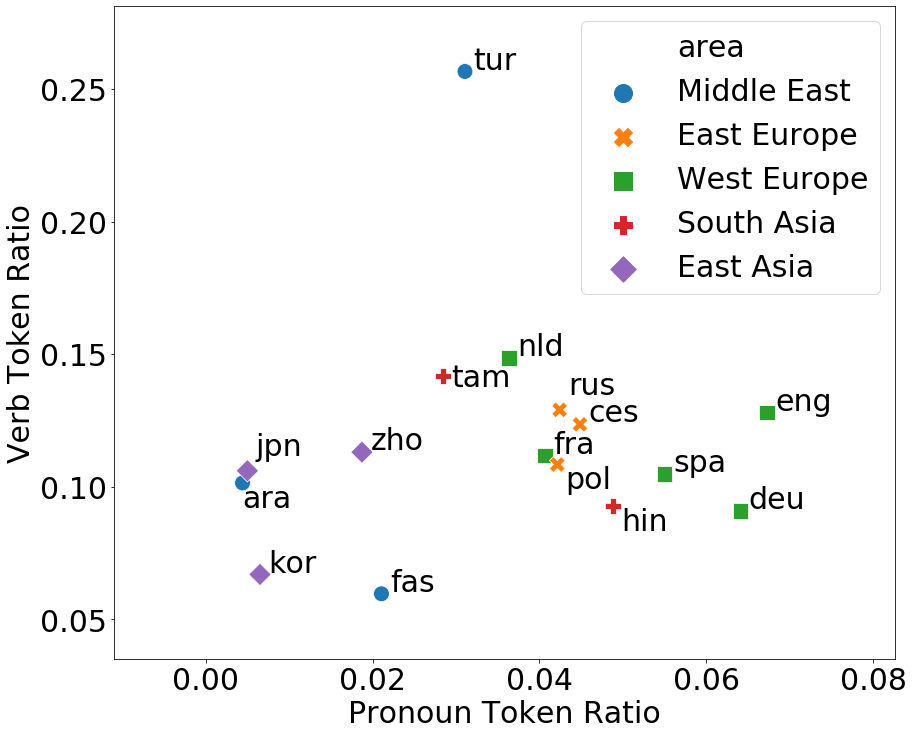

In [32]:
fig, ax = plt.subplots(figsize=(14, 12))
ax = sns.scatterplot(x='pron', 
                y='verb', 
                hue='area', # different colors by group
                style='area', # different shapes by group
                s=250, # marker size
                data=features)
for i, lang_name in enumerate(features['lang']):
        x, y = features['pron'][i]+ 0.001 , features['verb'][i] + 0.001
        if lang_name == 'ara': y -= 0.01; x -= 0.001
        if lang_name == 'pol': y -= 0.01;
        if lang_name == 'hin': y -= 0.01;
        if lang_name == 'jpn': y += 0.005;
        if lang_name == 'tam': y -= 0.005;
        if lang_name == 'rus': y += 0.005;
        ax.annotate(lang_name, (x, y), fontsize=30) # to adjust lang label size
ax.set_xlabel('Pronoun Token Ratio', fontdict={'size':30}) # to adjust x-axis label size
ax.set_ylabel('Verb Token Ratio', fontdict={'size':30}) # to adjus
ax.tick_params(axis='both', which='major', labelsize=30)
ax.legend(fontsize=30, loc='upper right', markerscale=3)
plt.savefig('lang_plot.svg')
plt.show()


In [25]:
ax

In [26]:
def plot_pos(feature_df, out_file, x='pron', y='verb'):
    lang = feature_df['lang']
    x_ratio = feature_df[x]
    y_ratio = feature_df[y]
    x_name = map_name[x]
    y_name = map_name[y]
    fig, ax = plt.subplots(figsize=(14, 12))
    plt.xlim(0, max(x_ratio) + min(x_ratio))
    plt.ylim(0, max(y_ratio) + min(y_ratio))
    ax.scatter(x_ratio, y_ratio,s=50)
    for i, lang_name in enumerate(lang):
        ax.annotate(lang_name, (x_ratio[i], y_ratio[i]), fontsize=25) # to adjust lang label size
    ax.set_xlabel(f'{x_name}-token Ratio', fontdict={'size':20}) # to adjust x-axis label size
    ax.set_ylabel(f'{y_name} Ratio', fontdict={'size':20}) # to adjust y-axis label size
    ax.tick_params(axis='both', which='major', labelsize=16)
#     plt.savefig(out_file)
    plt.show()
    return plt, ax
    

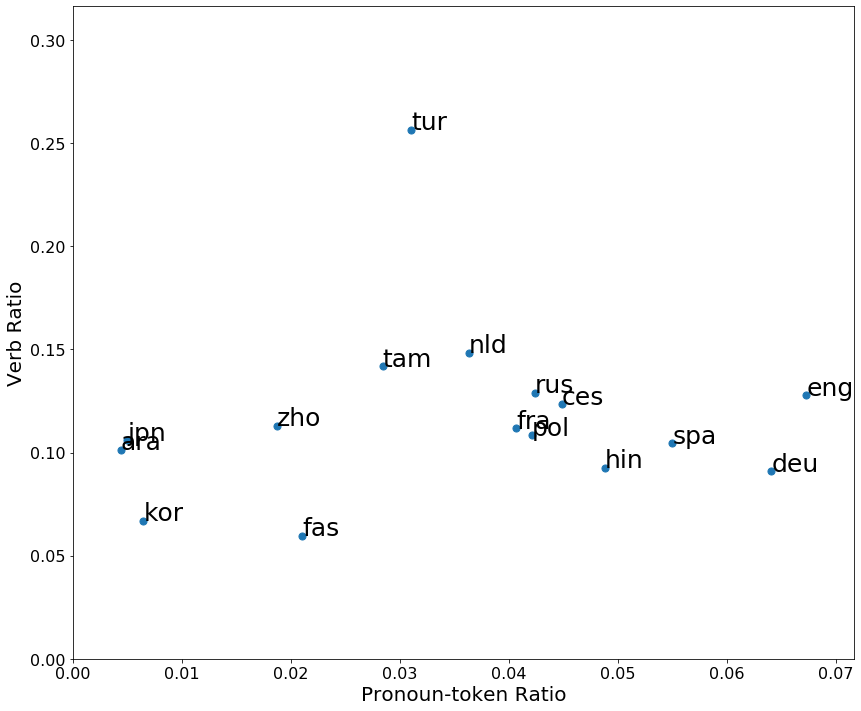

In [11]:
plt, ax = plot_pos(features, './figures/pron2verb-ratio.png')

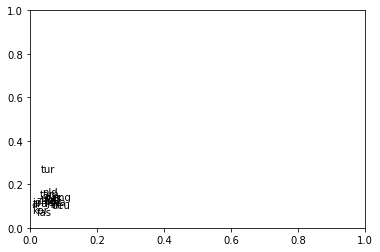

In [17]:
texts = [plt.text(features['pron'][i], features['verb'][i], features['lang'][i]) for i in range(len(features))]


500

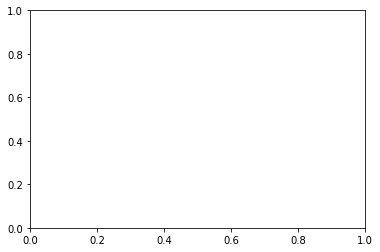

In [18]:
adjust_text(texts)


In [20]:
plt.show()